原始信号长度: 266656
得到的样本数: 52
每个样本长度: 10000


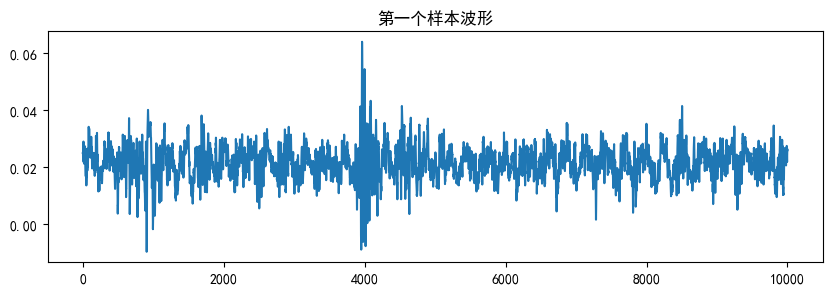

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
# === 设置中文显示 ===
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
# === 参数设置 ===
file_path = r"D:\deskbook\科研\数据集\phm2009\Supplementary-Dataset\PHM2009 Gearbox\PHM_Society_2009_Competition_Expanded_txt\helical 1\helical 1_30hz_Low_1.txt"  # 修改为你的txt文件路径
segment_length = 10000
overlap = 5000

# === 1. 读取 txt 文件 ===
# 假设每一列是一个通道，这里取第一列
data = np.loadtxt(file_path, delimiter=None)  # 自动检测分隔符（空格、制表符等）
channel_1 = data[:, 0]  # 只取第一通道

print(f"原始信号长度: {len(channel_1)}")

# === 2. 分段采样 ===
step = segment_length - overlap
segments = []

for start in range(0, len(channel_1) - segment_length + 1, step):
    end = start + segment_length
    segment = channel_1[start:end]
    segments.append(segment)

segments = np.array(segments)
print(f"得到的样本数: {segments.shape[0]}")
print(f"每个样本长度: {segments.shape[1]}")

# === 4. 可视化一个样本（可选）===

plt.figure(figsize=(10,3))
plt.plot(segments[0])
plt.title("第一个样本波形")
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os

# ===============================
# 参数设置
# ===============================
fs = 66.7e3           # 采样频率 (Hz)
segment_length = 10000  # 每段长度
overlap = 5000          # 重叠点数
wavelet = 'cmor1.5-1.0' # 复Morlet小波
output_dir = r"D:\deskbook\科研\时频图_论文风格"
os.makedirs(output_dir, exist_ok=True)

# ===============================
# 读取原始信号（txt第一列）
# ===============================
file_path = r"D:\deskbook\科研\数据集\phm2009\Supplementary-Dataset\PHM2009 Gearbox\PHM_Society_2009_Competition_Expanded_txt\helical 1\helical 1_30hz_Low_1.txt"
signal = np.loadtxt(file_path)
if signal.ndim > 1:
    signal = signal[:, 0]  # 仅取第一通道
print(f"原始信号长度: {len(signal)}")

# ===============================
# 分段逻辑
# ===============================
segments = []
start = 0
while start + segment_length <= len(signal):
    segment = signal[start:start + segment_length]
    segments.append(segment)
    start += (segment_length - overlap)

print(f"分段数量: {len(segments)}")

# ===============================
# 小波变换 + 绘图
# ===============================
for idx, seg in enumerate(segments):
    widths = np.arange(1, 256)
    cwtmatr, freqs = pywt.cwt(seg, widths, wavelet, sampling_period=1/fs)

    # 幅值归一化
    amplitude = np.abs(cwtmatr)
    amplitude /= amplitude.max()

    # 坐标轴
    freqs_kHz = freqs / 1000.0
    times = np.arange(len(seg)) / fs * 1e2  # ×10^-2 s

    # 限制频率范围（与论文一致）
    max_freq_kHz = 40
    freq_mask = freqs_kHz <= max_freq_kHz
    amplitude = amplitude[freq_mask, :]
    freqs_kHz = freqs_kHz[freq_mask]

    # 绘图
    plt.figure(figsize=(4, 3))
    plt.imshow(amplitude, extent=[times[0], times[-1], freqs_kHz[-1], freqs_kHz[0]],
               cmap='jet', aspect='auto', vmin=0, vmax=0.1)
    plt.xlabel("Time(10⁻² s)")
    plt.ylabel("Frequency(kHz)")
    plt.colorbar(label='', fraction=0.046, pad=0.04)
    plt.tight_layout()

    # 保存
    save_path = os.path.join(output_dir, f"seg_{idx+1}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ 已保存: {save_path}")

print("🎯 时频图生成完成（论文风格）！")


原始信号长度: 266656
分段数量: 52


C:\Users\liuying\AppData\Local\Temp\ipykernel_7672\2688941904.py:65: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\liuying\AppData\Local\Temp\ipykernel_7672\2688941904.py:65: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\liuying\AppData\Local\Temp\ipykernel_7672\2688941904.py:69: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) SimHei.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
C:\Users\liuying\AppData\Local\Temp\ipykernel_7672\2688941904.py:69: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')


✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_1.png
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_2.png
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_3.png
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_4.png


KeyboardInterrupt: 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
from scipy import signal as scipy_signal

# ===============================
# 参数设置（根据论文调整）
# ===============================
fs = 66.7e3           # 采样频率 (Hz)，与论文一致
segment_length = 10000  # 每段长度
overlap = 5000          # 重叠点数
wavelet = 'morl'        # Morlet小波（论文中明确使用）
scales = np.arange(1, 128)  # 尺度参数，控制频率分辨率
output_dir = r"D:\deskbook\科研\时频图_论文风格"
os.makedirs(output_dir, exist_ok=True)

# ===============================
# 读取原始信号
# ===============================
file_path = r"D:\deskbook\科研\数据集\phm2009\Supplementary-Dataset\PHM2009 Gearbox\PHM_Society_2009_Competition_Expanded_txt\helical 1\helical 1_30hz_Low_1.txt"
signal_data = np.loadtxt(file_path)
if signal_data.ndim > 1:
    signal_data = signal_data[:, 0]  # 仅取第一通道

print(f"原始信号长度: {len(signal_data)}")

# ===============================
# 信号预处理（可选：去噪和标准化）
# ===============================
def preprocess_signal(signal):
    """信号预处理"""
    # 去直流分量
    signal = signal - np.mean(signal)
    # 标准化
    signal = signal / np.max(np.abs(signal))
    return signal

signal_data = preprocess_signal(signal_data)

# ===============================
# 分段逻辑
# ===============================
segments = []
start = 0
while start + segment_length <= len(signal_data):
    segment = signal_data[start:start + segment_length]
    segments.append(segment)
    start += (segment_length - overlap)

print(f"分段数量: {len(segments)}")

# ===============================
# 论文风格的小波变换 + 绘图
# ===============================
def generate_time_frequency_image(segment, fs, segment_idx):
    """生成论文风格的时频图像"""

    # 执行连续小波变换
    coefficients, frequencies = pywt.cwt(segment, scales, wavelet, sampling_period=1/fs)

    # 计算幅度并归一化到[0,1]（论文中提到的预处理）
    amplitude = np.abs(coefficients)
    amplitude_normalized = (amplitude - np.min(amplitude)) / (np.max(amplitude) - np.min(amplitude))

    # 调整图像尺寸为128×128（论文中CNN输入尺寸）
    from scipy.ndimage import zoom
    if amplitude_normalized.shape != (128, 128):
        zoom_factors = (128/amplitude_normalized.shape[0], 128/amplitude_normalized.shape[1])
        amplitude_resized = zoom(amplitude_normalized, zoom_factors, order=1)
    else:
        amplitude_resized = amplitude_normalized

    # 创建RGB图像（3通道）
    rgb_image = np.zeros((128, 128, 3))
    for i in range(3):
        rgb_image[:, :, i] = amplitude_resized

    return rgb_image, frequencies

# 生成所有分段的时频图像
for idx, segment in enumerate(segments[:10]):  # 只处理前10个分段作为示例
    try:
        # 生成时频图像
        tf_image, freqs = generate_time_frequency_image(segment, fs, idx)

        # 保存为npy文件（用于后续CNN训练）
        npy_path = os.path.join(output_dir, f"seg_{idx+1:03d}.npy")
        np.save(npy_path, tf_image)

        # 同时保存可视化图像（用于检查）
        plt.figure(figsize=(6, 4))
        plt.imshow(tf_image[:, :, 0], cmap='jet', aspect='auto',
                  extent=[0, len(segment)/fs*1000, freqs[-1]/1000, freqs[0]/1000])
        plt.xlabel('Time (ms)')
        plt.ylabel('Frequency (kHz)')
        plt.title(f'Time-Frequency Image - Segment {idx+1}')
        plt.colorbar(label='Normalized Amplitude')

        img_path = os.path.join(output_dir, f"seg_{idx+1:03d}.png")
        plt.savefig(img_path, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"✅ 已保存: {img_path} 和 {npy_path}")

    except Exception as e:
        print(f"❌ 处理分段 {idx+1} 时出错: {e}")

print("🎯 论文风格时频图生成完成！")

原始信号长度: 266656
分段数量: 52
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_001.png 和 D:\deskbook\科研\时频图_论文风格\seg_001.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_002.png 和 D:\deskbook\科研\时频图_论文风格\seg_002.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_003.png 和 D:\deskbook\科研\时频图_论文风格\seg_003.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_004.png 和 D:\deskbook\科研\时频图_论文风格\seg_004.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_005.png 和 D:\deskbook\科研\时频图_论文风格\seg_005.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_006.png 和 D:\deskbook\科研\时频图_论文风格\seg_006.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_007.png 和 D:\deskbook\科研\时频图_论文风格\seg_007.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_008.png 和 D:\deskbook\科研\时频图_论文风格\seg_008.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_009.png 和 D:\deskbook\科研\时频图_论文风格\seg_009.npy
✅ 已保存: D:\deskbook\科研\时频图_论文风格\seg_010.png 和 D:\deskbook\科研\时频图_论文风格\seg_010.npy
🎯 论文风格时频图生成完成！
